각종 전시회, 컨벤션 및 행사를 기획․조직하는 산업활동을 말한다. 전시회, 컨벤션 및 행사와 관련된 조사, 기획, 설계, 구성, 제작, 시공감리 등에 관한 전반적인 책임을 맡아 이러한 시설의 내장, 외장, 전시장치, 기계 설비(음향, 영상 등) 등을 종합적으로 구성․연출하는 사업체도 포함한다. 전시회 및 회의 장소만을 임대하는 경우는 제외한다.

<예시>
·산업 박람회 기획
·주택 전시회 기획
·패션쇼 기획
·디스플레이 서비스업
·과학 행사 기획
·문화 행사 기획
·전시시설 기획 및 연출

<제외>
·과학 및 문화 전시관 운영(90221)
·전시회장 및 컨벤션장 임대(68112)

In [1]:
# 한글문제 해결처리 
################################################################
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc
import platform
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# 경고문 숨기기
import warnings
warnings.filterwarnings(action='ignore')

def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [2]:
data = pd.read_csv("업종별/전시 및 행사 대행업.csv", encoding='utf-8', index_col=0,parse_dates=['REG_YYMM'])

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330569 entries, 0 to 330568
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   REG_YYMM      330569 non-null  object
 1   CARD_SIDO_NM  330569 non-null  object
 2   CARD_CCG_NM   330062 non-null  object
 3   STD_CLSS_NM   330569 non-null  object
 4   HOM_SIDO_NM   330569 non-null  object
 5   HOM_CCG_NM    328382 non-null  object
 6   AGE           330569 non-null  object
 7   SEX_CTGO_CD   330569 non-null  int64 
 8   FLC           330569 non-null  int64 
 9   CSTMR_CNT     330569 non-null  int64 
 10  AMT           330569 non-null  int64 
 11  CNT           330569 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 32.8+ MB
None


In [4]:
#안쓰는 컬럼 드랍
df=data.drop(['CARD_CCG_NM', 'HOM_CCG_NM', 'STD_CLSS_NM'], axis=1)

In [5]:
df = df.fillna('')
df['year'] = df['REG_YYMM'].apply(lambda x: grap_year(x))
df['month'] = df['REG_YYMM'].apply(lambda x: grap_month(x))

In [6]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330569 entries, 0 to 330568
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   REG_YYMM      330569 non-null  object
 1   CARD_SIDO_NM  330569 non-null  object
 2   HOM_SIDO_NM   330569 non-null  object
 3   AGE           330569 non-null  object
 4   SEX_CTGO_CD   330569 non-null  int64 
 5   FLC           330569 non-null  int64 
 6   CSTMR_CNT     330569 non-null  int64 
 7   AMT           330569 non-null  int64 
 8   CNT           330569 non-null  int64 
 9   year          330569 non-null  int64 
 10  month         330569 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 30.3+ MB
None
  REG_YYMM CARD_SIDO_NM HOM_SIDO_NM  AGE  SEX_CTGO_CD  FLC  CSTMR_CNT     AMT  \
0   201901           강원          강원  20s            1    1         11  174650   
1   201901           강원          강원  20s            2    1         12  129000   
2   201901           강원        

In [7]:
print(df.CARD_SIDO_NM.unique())
print(df.HOM_SIDO_NM.unique())

['강원' '경기' '경남' '경북' '광주' '대구' '대전' '부산' '서울' '세종' '울산' '인천' '전남' '전북'
 '제주' '충남' '충북']
['강원' '경기' '대구' '대전' '서울' '울산' '인천' '충남' '경남' '경북' '광주' '부산' '세종' '전북'
 '충북' '전남' '제주']


CARD_SIDO_NM
세종      126253035
광주      244743400
대전      377130429
충북      462606150
울산      665049470
충남      811625958
전북      964019236
경남     1661136422
경북     2466359885
대구     2732390405
인천     2867588098
부산     5081965114
제주     5776934070
전남     6914529702
강원    11883341158
서울    16050956942
경기    45420814772
Name: AMT, dtype: int64


Text(0.5, 1.0, '지역별 AMT')

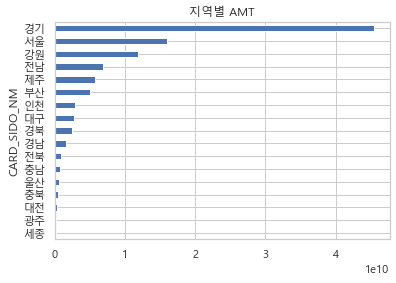

In [8]:
df1 = df.groupby('CARD_SIDO_NM')['AMT'].sum().sort_values()
print(df1)
df1.plot(kind="barh")
plt.title("지역별 AMT")

REG_YYMM
201901     5707804120
201902     5482064316
201903     6226218379
201904     6868361918
201905     9032367823
201906     8474283388
201907     8268305998
201908    12862880397
201909     8291871697
201910    10047488975
201911     5901199422
201912     6784209043
202001     6569681998
202002     2373964614
202003     1616742158
Name: AMT, dtype: int64


Text(0.5, 1.0, '기간별 AMT')

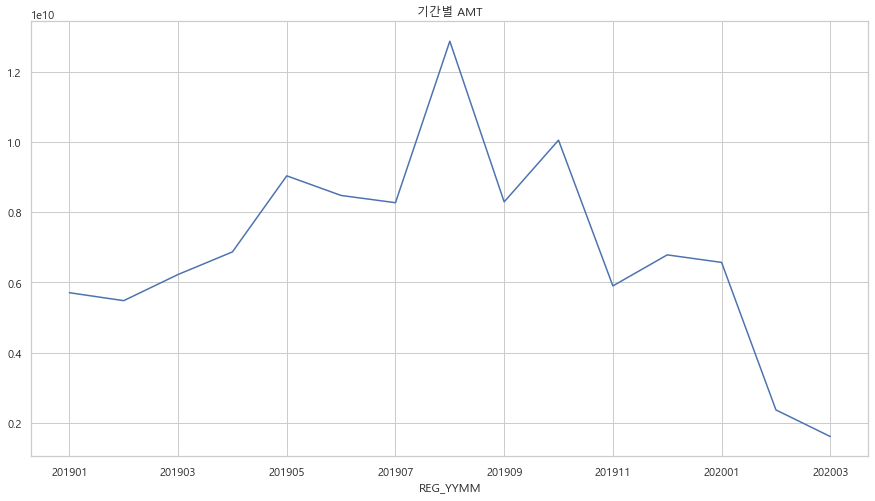

In [9]:
df2 = df.groupby('REG_YYMM')['AMT'].sum()
print(df2)
df2.plot(figsize=(15,8))
plt.title("기간별 AMT")

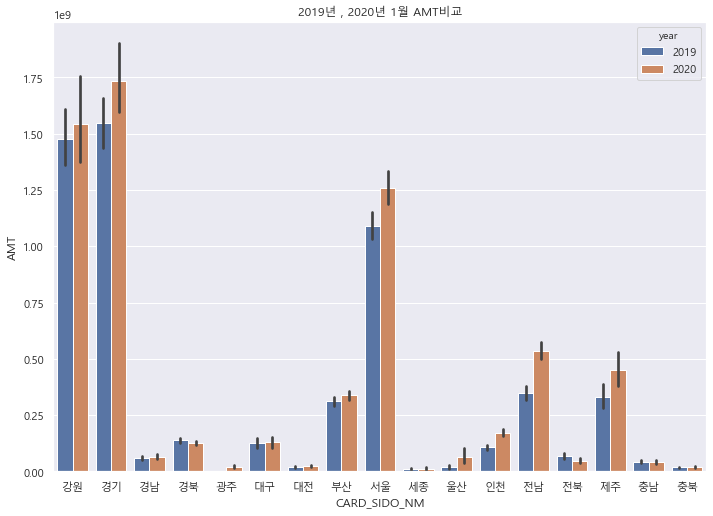

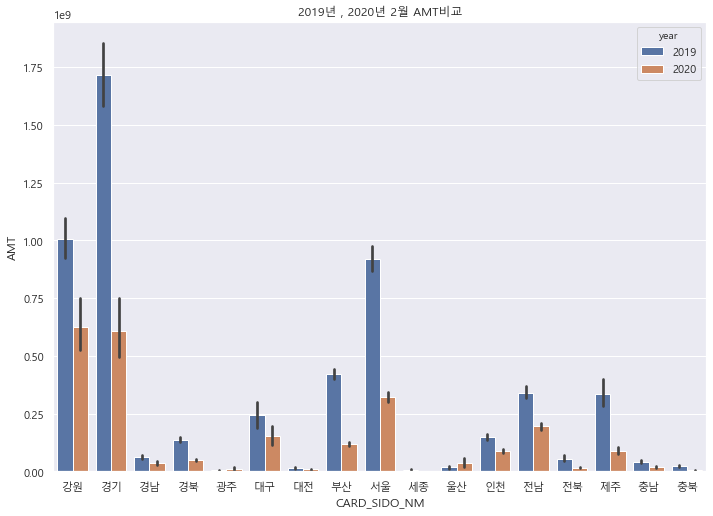

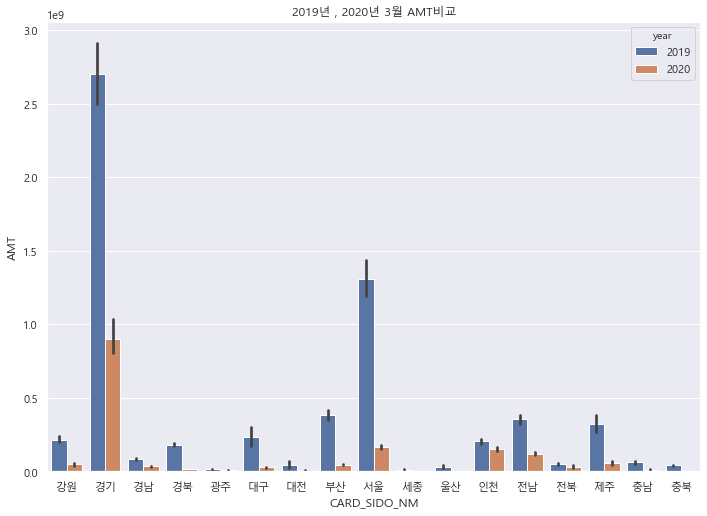

In [10]:
for i in range(1, 4):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    df_month = df[df.month == i]
    sns.barplot(data = df_month, x = 'CARD_SIDO_NM', y = 'AMT', hue = 'year',  estimator = sum)
    plt.title("2019년 , 2020년 %d월 AMT비교" %i)
    plt.show()

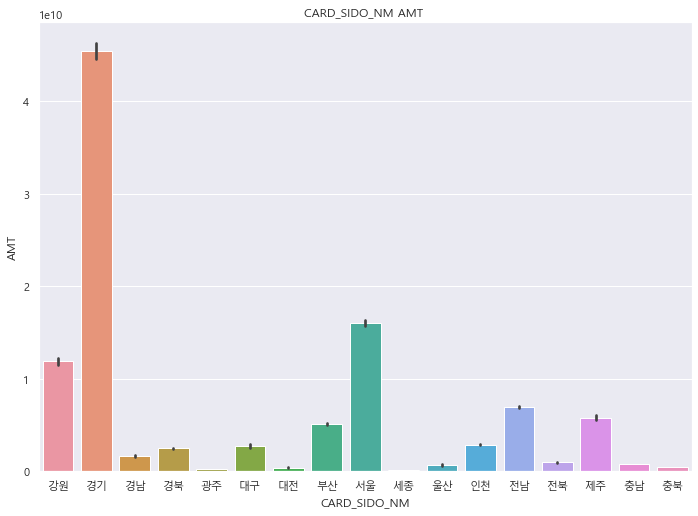

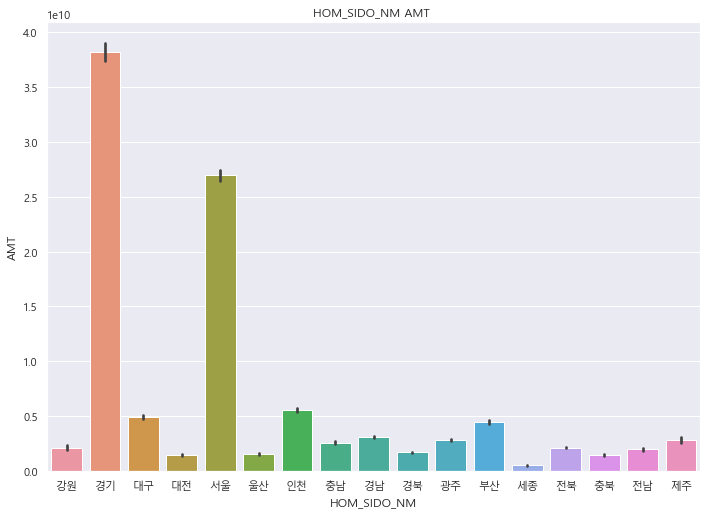

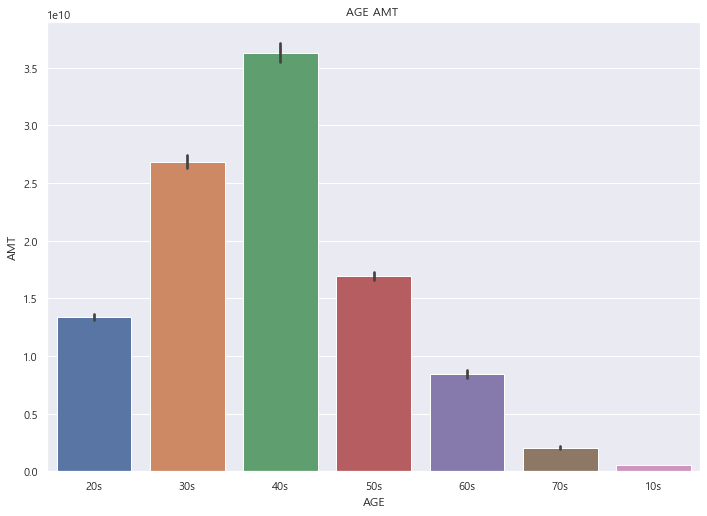

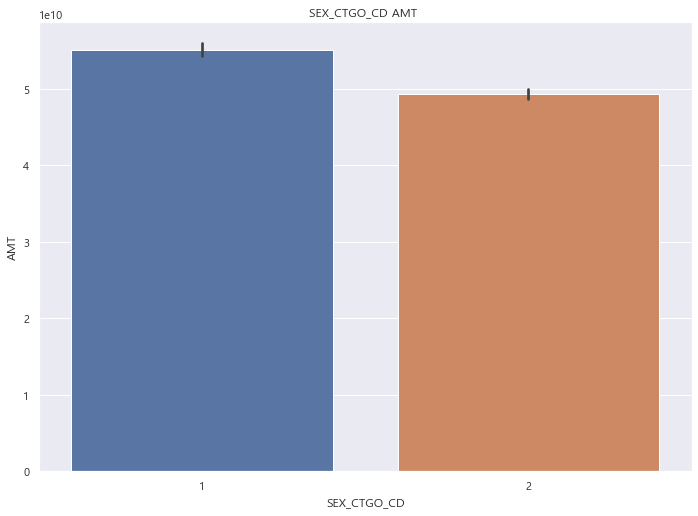

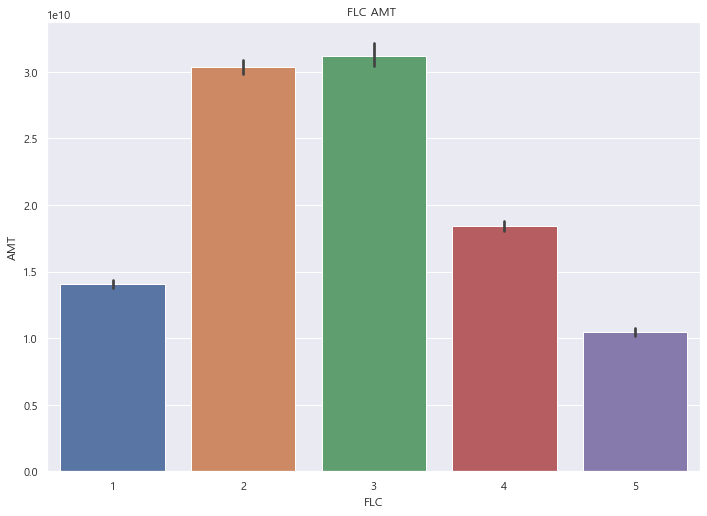

In [11]:
cols = ['CARD_SIDO_NM', 'HOM_SIDO_NM','AGE','SEX_CTGO_CD', 'FLC']
for val in cols:
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    sns.barplot(data = df, y = 'AMT', x = val, orient = 'v',estimator = sum)
    plt.title(val +' AMT ')
    plt.show()

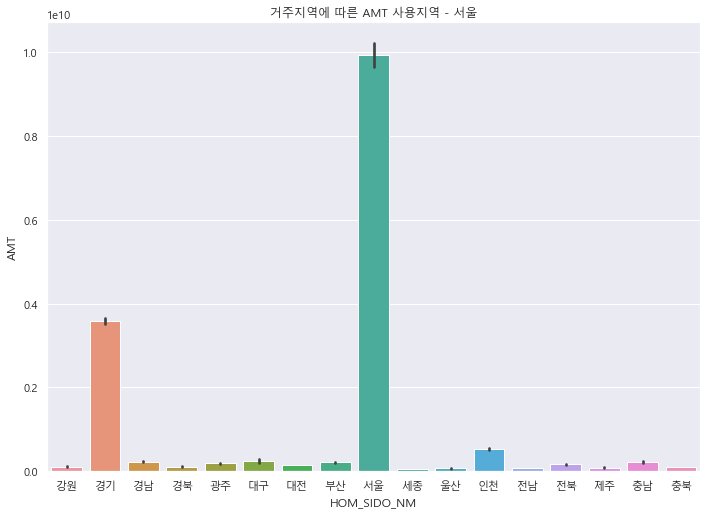

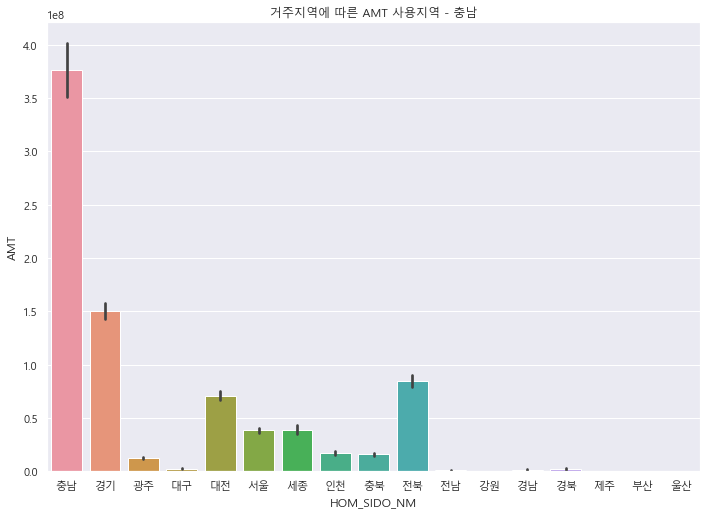

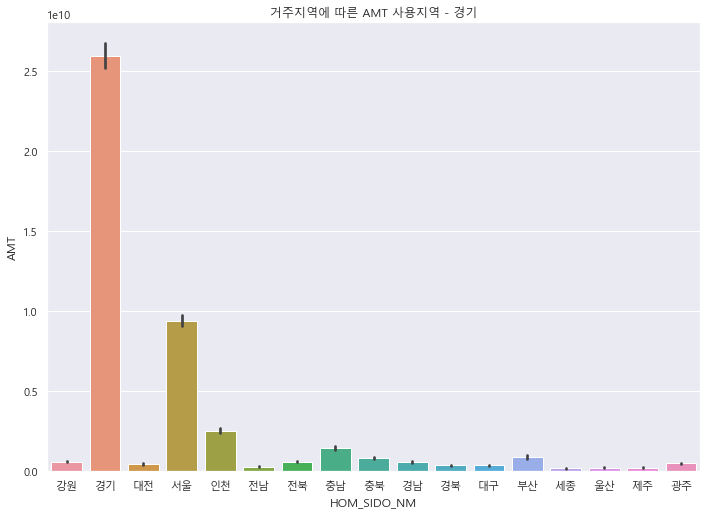

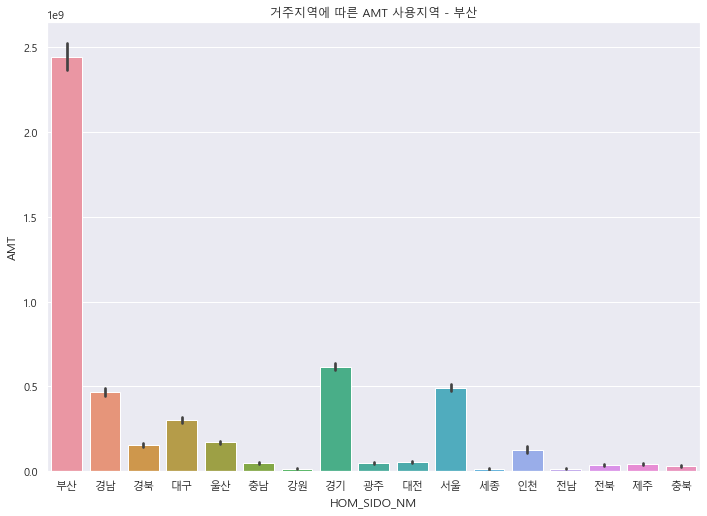

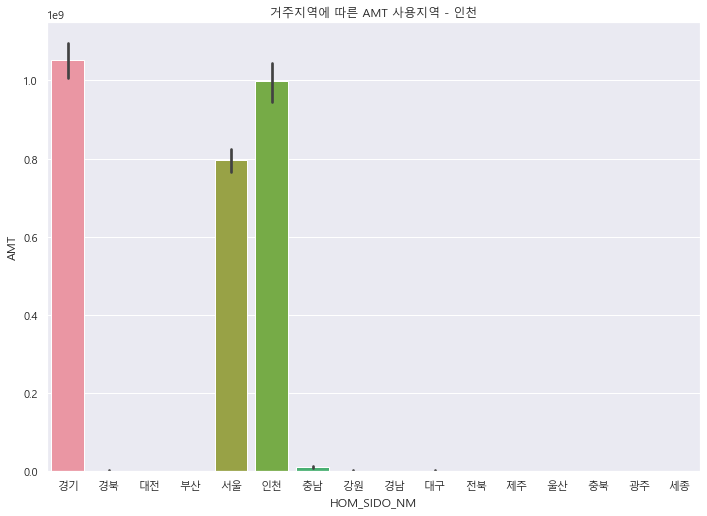

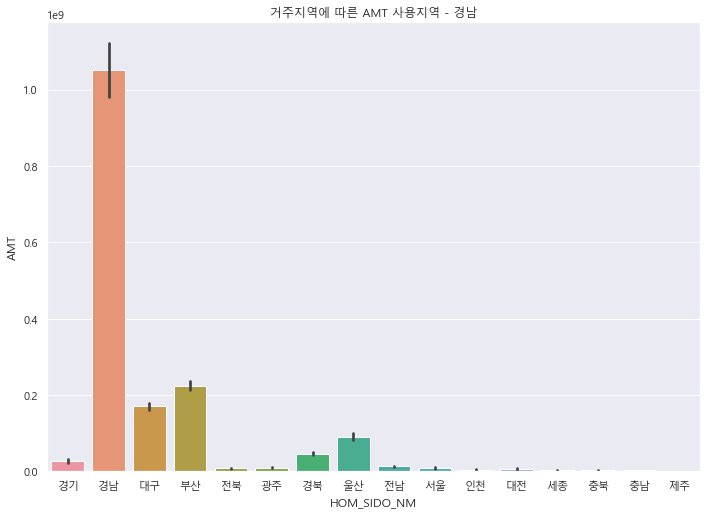

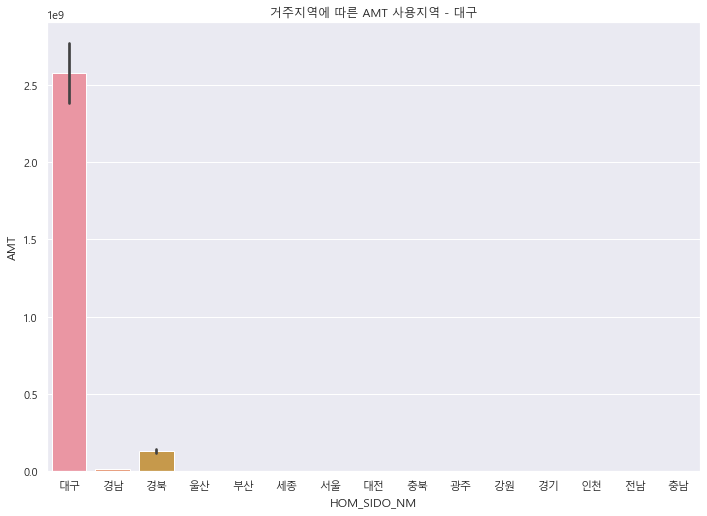

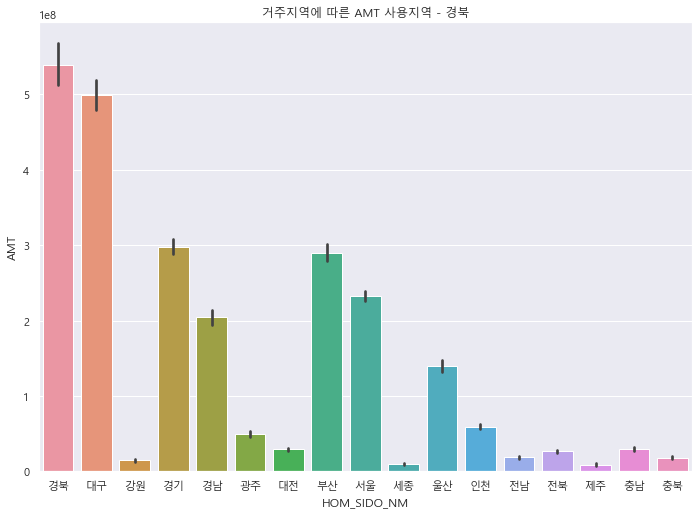

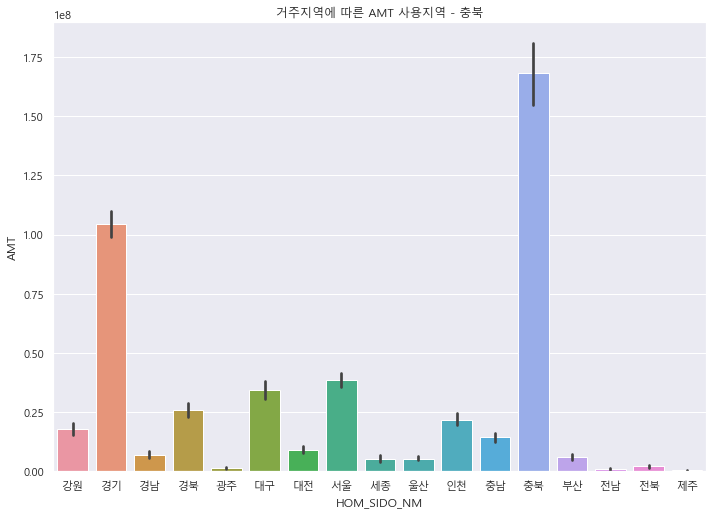

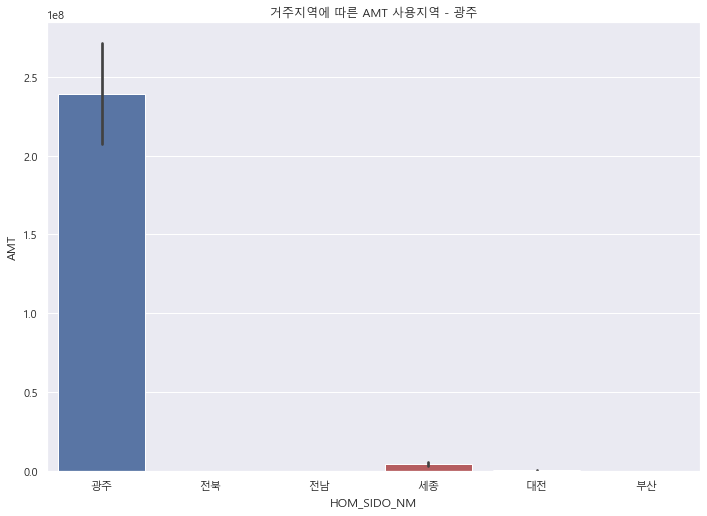

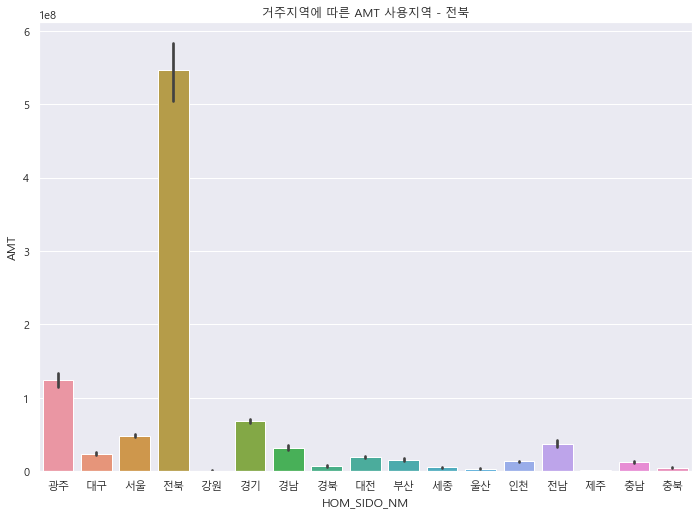

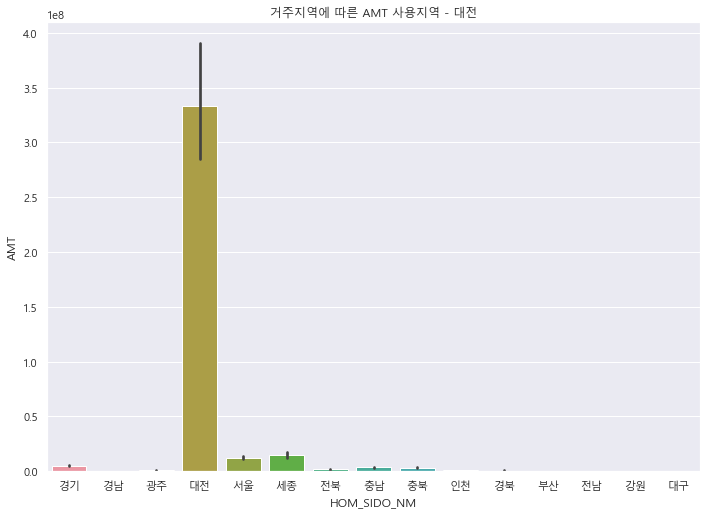

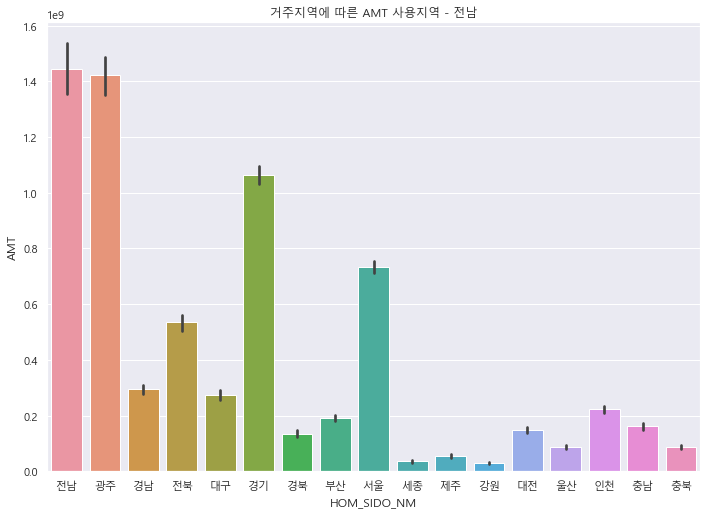

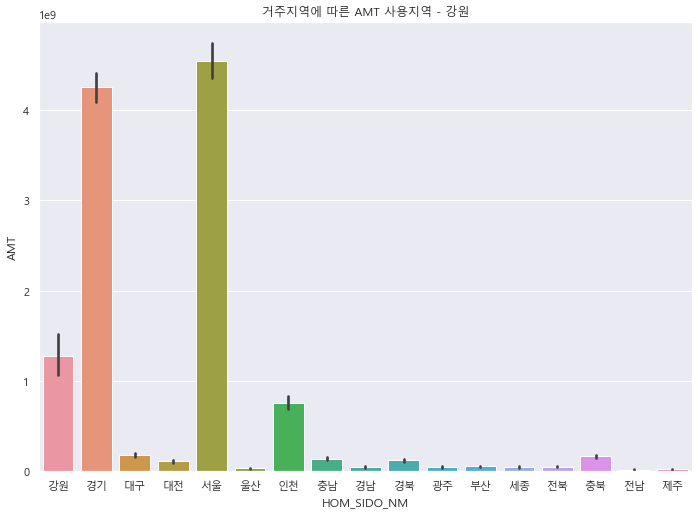

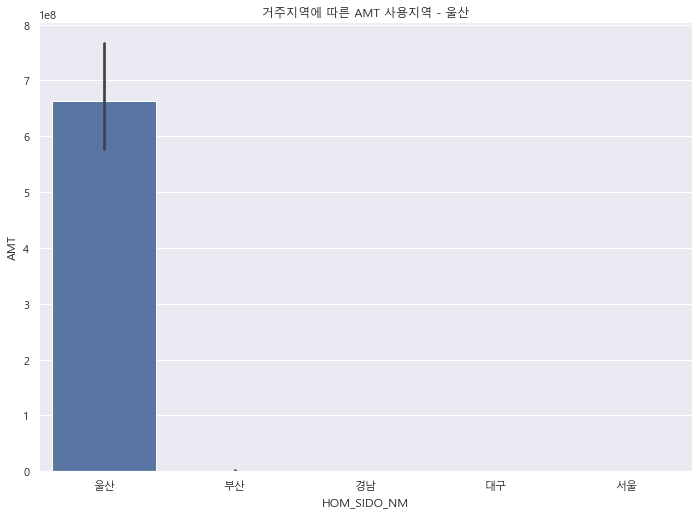

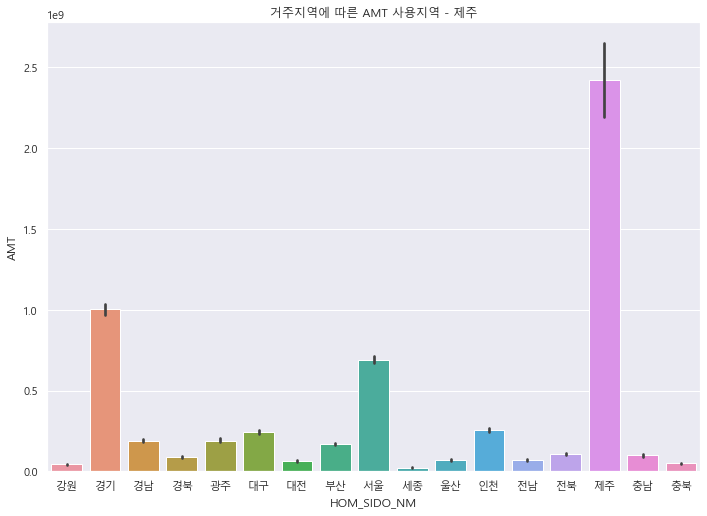

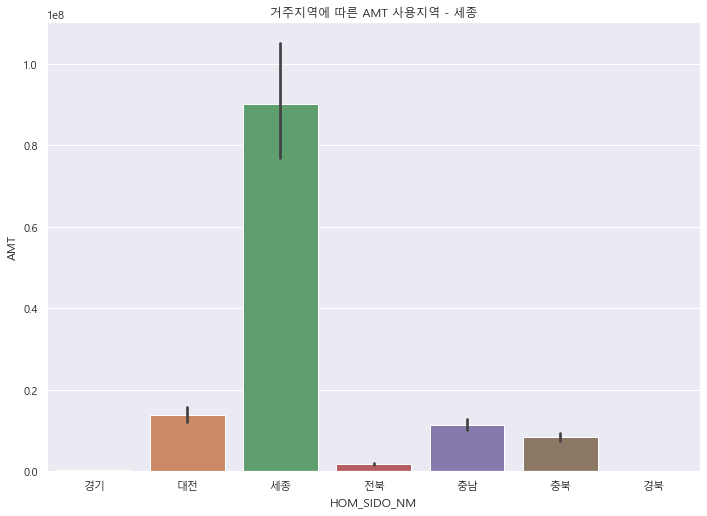

In [12]:
cols = ['서울', '충남', '경기', '부산', '인천','경남', '대구', '경북', '충북', '광주','전북','대전', '전남', '강원', '울산', '제주', '세종']
    
for val in cols:
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    sns.barplot(data = df[df.CARD_SIDO_NM == val], x = 'HOM_SIDO_NM', y = 'AMT',  estimator = sum)
    plt.title('거주지역에 따른 AMT 사용지역 - ' + val)
    plt.show()